In [1]:
import os
import tarfile
from six.moves import urllib

In [2]:
download_root= "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
housing_path= os.path.join("datasets","housing")
housing_url= download_root + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url= housing_url, housing_path= housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path= os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz= tarfile.open(tgz_path)
    housing_tgz.extractall(path= housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

In [6]:
def load_housing_data(housing_path= housing_path):
    csv_path= os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing= load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


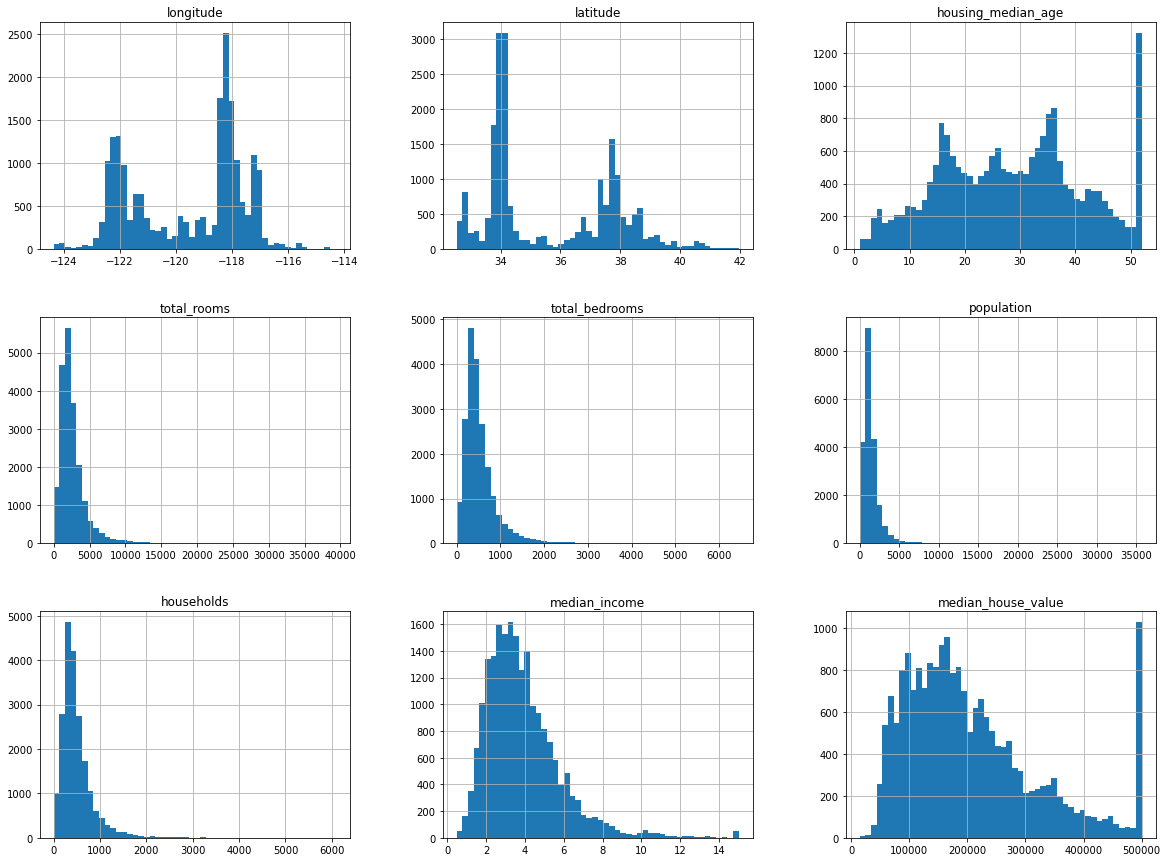

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins= 50, figsize= (20,15))
plt.show()

In [12]:
import numpy as np
np.random.seed(42)

In [13]:
def train_test_split(data, test_ratio):
    shuffled_indices= np.random.permutation(len(data))
    test_set_size= int(len(data)*test_ratio)
    test_indices= shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set= train_test_split(housing, 0.2)
len(train_set)

16512

In [15]:
len(test_set)

4128

In [16]:
from zlib  import crc32
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier) & 0xffffffff <test_ratio*2**32)

def split_train_test_by_id(data, test_ratio, id_column):
    ids= data[id_column]
    in_test_set= ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
import hashlib

def test_set_check(identifier, test_ratio, hash= hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [18]:
housing_with_id= housing.reset_index() # adds an `index` column
train_set, test_set= split_train_test_by_id(housing_with_id, 0.2, "index")

In [19]:
housing_with_id["id"]= housing["longitude"]*1000 + housing["latitude"]
train_set, test_set= split_train_test_by_id(housing_with_id,0.2,"id")

In [20]:
test_set.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,id
8,8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY,-122222.16
10,10,-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY,-122222.15
11,11,-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY,-122222.15
12,12,-122.26,37.85,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY,-122222.15
13,13,-122.26,37.84,52.0,696.0,191.0,345.0,174.0,2.6736,191300.0,NEAR BAY,-122222.16


In [21]:
from sklearn.model_selection import train_test_split
train_set, test_set= train_test_split(housing, test_size= 0.2, random_state= 42)

In [22]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


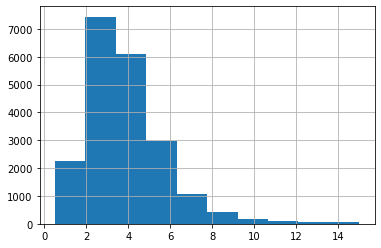

In [23]:
housing["median_income"].hist();

In [24]:
housing["income_cat"]= pd.cut(housing["median_income"],
                             bins= [0.,1.5,3.,4.5,6., np.inf],
                             labels= [1,2,3,4,5])

In [25]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

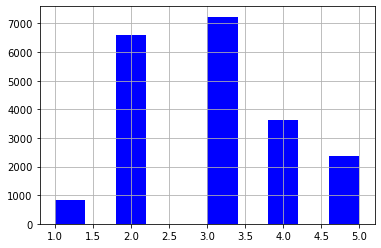

In [26]:
housing["income_cat"].hist(color= "blue")

In [27]:
from sklearn.model_selection import StratifiedShuffleSplit
split= StratifiedShuffleSplit(n_splits= 1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set= housing.loc[train_index]
    strat_test_set= housing.loc[test_index]

In [28]:
strat_test_set["income_cat"].value_counts()/ len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [29]:
housing["income_cat"].value_counts()/ len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [30]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts()/ len(data)
train_set, test_set= train_test_split(housing, test_size= 0.2, random_state= 42)
compare_props= pd.DataFrame({ #props= proportions
    "overall": income_cat_proportions(housing),
    "stratified": income_cat_proportions(strat_test_set),
    "random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"]= 100* compare_props["random"]/ compare_props["overall"]-100
compare_props["Strat. %error"]= 100* compare_props["stratified"]/ compare_props["overall"]- 100

In [31]:
compare_props

,overall,stratified,random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [32]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1,inplace= True)

# Discover and Visualize the Data to Gain Insights

In [33]:
housing= strat_train_set.copy()

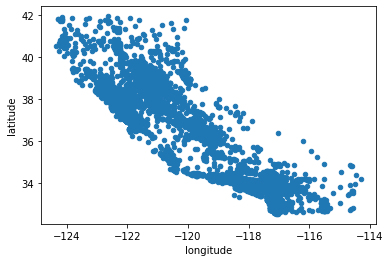

In [34]:
#Visualizing Geographical Data
housing.plot(kind="scatter", x="longitude", y="latitude");

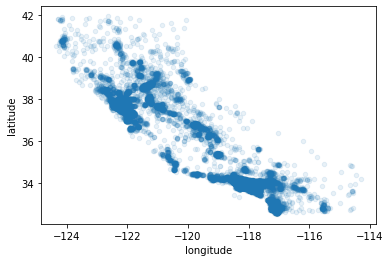

In [35]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha= 0.1);

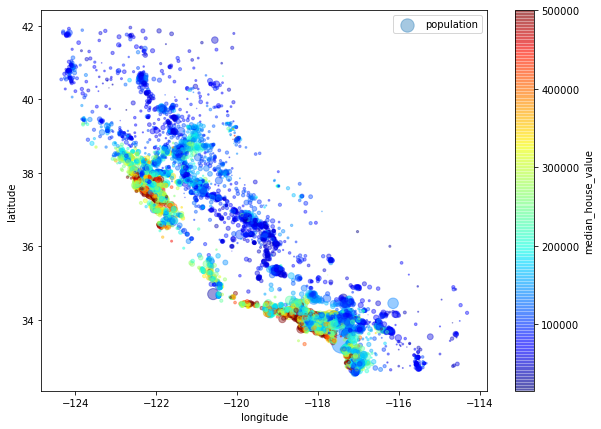

In [36]:
housing.plot(kind= "scatter", x= "longitude", y= "latitude", alpha= 0.4,
            s= housing["population"]/100, label= "population", figsize= (10,7),
            c= "median_house_value", cmap= plt.get_cmap("jet"), colorbar= True,
            sharex= False);
plt.legend();

In [37]:
# Download the California image
PROJECT_ROOT_DIR= r"C:\Users\user\Downloads"
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('C:\\Users\\user\\Downloads\\images\\end_to_end_project\\california.png',
 <http.client.HTTPMessage at 0x1ed236620a0>)

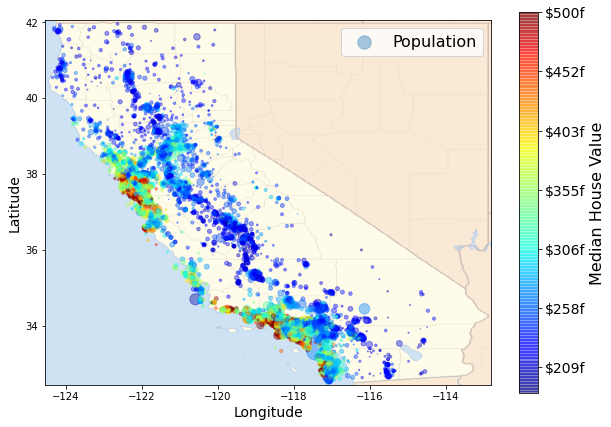

In [38]:
import matplotlib.image as mpimg
california_img= mpimg.imread(os.path.join(images_path, filename))
ax= housing.plot(kind= "scatter", x= "longitude", y= "latitude", figsize= (10,7),
                s= housing["population"]/100, label= "Population",
                c= "median_house_value", cmap= plt.get_cmap("jet"),
                colorbar= False, alpha= 0.4)
plt.imshow(california_img, extent= [-124.55, -112.80, 32.45, 42.05], alpha= 0.5,
          cmap= plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize= 14)
plt.xlabel("Longitude", fontsize= 14)

prices= housing["median_house_value"]
tick_values= np.linspace(prices.min(), prices.max(), 11)
cbar= plt.colorbar(ticks= tick_values/ prices.max())
cbar.ax.set_yticklabels(["$%df"%(round(v/1000)) for v in tick_values], fontsize= 14)
cbar.set_label("Median House Value", fontsize= 16)
plt.legend(fontsize= 16)
plt.show()

## Looking for Correlations

In [39]:
corr_matrix= housing.corr()

In [40]:
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

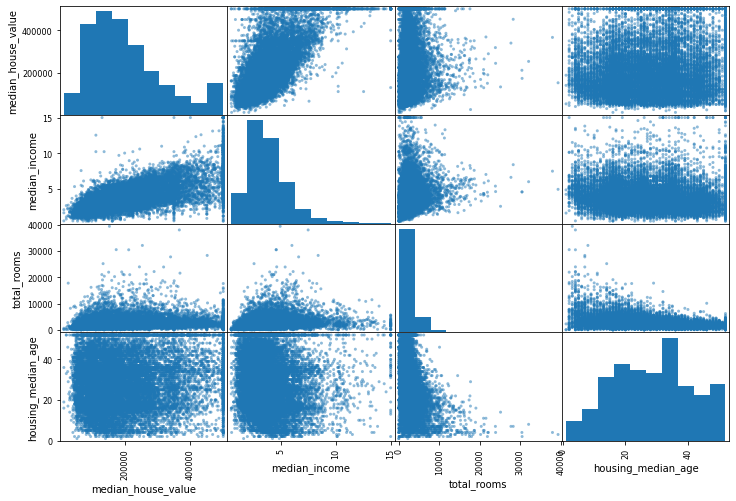

In [41]:
from pandas.plotting import scatter_matrix
attributes= ["median_house_value", 'median_income', "total_rooms",
            "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

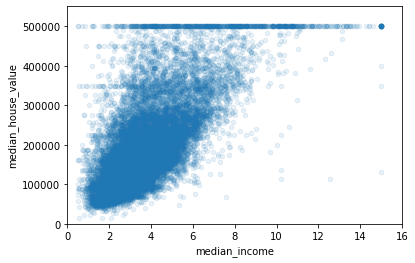

In [42]:
housing.plot(kind= "scatter", x= "median_income", y= "median_house_value", alpha= 0.1);
plt.axis([0, 16, 0, 550000]);

## Experimenting with Attribute Combinations

In [43]:
housing["rooms_per_household"]= housing["total_rooms"]/ housing["households"]
housing["bedrooms_per_room"]= housing["total_bedrooms"]/ housing["total_rooms"]
housing["population_per_household"]= housing["population"]/ housing["households"]

In [44]:
corr_matrix= housing.corr()

In [45]:
corr_matrix["median_house_value"].sort_values(ascending= False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

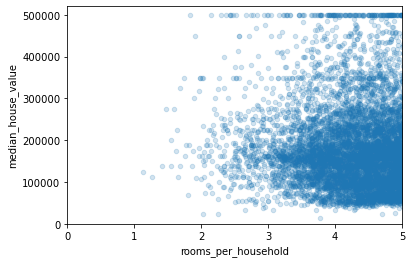

In [46]:
housing.plot(kind= "scatter", x= "rooms_per_household", y= "median_house_value", alpha= 0.2);
plt.axis([0,5,0,520000]);

In [47]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


## Preparing the Data for Machine Learning Algorithms

In [48]:
housing= strat_train_set.drop("median_house_value", axis= 1)
housing_labels= strat_train_set["median_house_value"].copy()

In [49]:
sample_incomplete_rows= housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,NaN,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,NaN,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,NaN,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,NaN,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,NaN,1145.0,480.0,6.3580,NEAR OCEAN


In [50]:
median= housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace= True)

In [51]:
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330,NEAR BAY
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193,<1H OCEAN
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813,<1H OCEAN
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891,<1H OCEAN
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580,NEAR OCEAN


In [52]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy= "median")

In [53]:
housing_num= housing.drop("ocean_proximity",axis=1)

In [54]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [55]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [56]:
housing_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [57]:
x= imputer.transform(housing_num)

In [58]:
housing_tr= pd.DataFrame(x, columns= housing_num.columns,
                        index= housing.index)

In [59]:
housing_tr.loc[sample_incomplete_rows.index.values]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
1606,-122.08,37.88,26.0,2947.0,433.0,825.0,626.0,2.9330
10915,-117.87,33.73,45.0,2264.0,433.0,1970.0,499.0,3.4193
19150,-122.70,38.35,14.0,2313.0,433.0,954.0,397.0,3.7813
4186,-118.23,34.13,48.0,1308.0,433.0,835.0,294.0,4.2891
16885,-122.40,37.58,26.0,3281.0,433.0,1145.0,480.0,6.3580


In [60]:
housing_tr= pd.DataFrame(x, columns= housing_num.columns,
                        index= housing.index)

In [61]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## Handling Text and Categorical Attributes

In [62]:
housing_cat= housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [63]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder= OrdinalEncoder()
housing_cat_encoded= ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [64]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [65]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder= OneHotEncoder(handle_unknown= "ignore")
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [66]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [67]:
cat_encoder= OneHotEncoder(sparse= False, handle_unknown= "ignore")
housing_cat_1hot= cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [68]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [69]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix= 3,4,5,6

class combinedattributesadder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room= True):
        self.add_bedrooms_per_room= add_bedrooms_per_room
    def fit(self,x,y= None):
        return self
    def transform(self,x):
        rooms_per_household= x[:,rooms_ix]/ x[:,households_ix]
        population_per_household= x[:,population_ix]/ x[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room= x[:,bedrooms_ix]/ x[:,rooms_ix]
            return np.c_[x, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[x, rooms_per_household, population_per_household]
attr_adder= combinedattributesadder(add_bedrooms_per_room= False)
housing_extra_attributes= attr_adder.transform(housing.values)

In [70]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names] # get the column indices

In [71]:
housing_extra_attributes = pd.DataFrame(
    housing_extra_attributes,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attributes.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


## Transformation Pipelines

In [72]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline= Pipeline([
    ("imputer", SimpleImputer(strategy= "median")),
    ("attribs_adder", combinedattributesadder()),
    ("Std_Scaler", StandardScaler()),
])
housing_num_tr= num_pipeline.fit_transform(housing_num)

In [73]:
housing_num_tr

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.01739526,
         0.00622264, -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.56925554,
        -0.04081077, -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, ..., -0.01802432,
        -0.07537122, -0.33827252],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ..., -0.5092404 ,
        -0.03743619,  0.32286937],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.32814891,
        -0.05915604, -0.45702273],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.01407228,
         0.00657083, -0.12169672]])

In [74]:
from sklearn.compose import ColumnTransformer
num_attributes= list(housing_num)
cat_attributes= ["ocean_proximity"]
full_pipeline= ColumnTransformer([
    ("num", num_pipeline, num_attributes),
    ("cat", OneHotEncoder(handle_unknown= "ignore"), cat_attributes),
])
housing_prepared= full_pipeline.fit_transform(housing)

In [75]:
housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [76]:
housing_prepared.shape

(16512, 16)

In [77]:
from sklearn.base import BaseEstimator, TransformerMixin
# Creating a class to select numerical or categorical columns 
class olddataframeselector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
    def fit(self,x,y=None):
        return self
    def transform(self,x):
        return x[self.attribute_names].values

In [78]:
num_attribs= list(housing_num)
cat_attribs=["ocean_proximity"]
old_num_pipeline= Pipeline([
    ("Selector", olddataframeselector(num_attribs)),
    ("imputer", SimpleImputer(strategy= "median")),
    ("attribs_adder", combinedattributesadder()),
    ("std scaler", StandardScaler()),
])
old_cat_pipeline= Pipeline([
    ("selector", olddataframeselector(cat_attribs)),
    ("cat_encoder", OneHotEncoder(sparse= False, handle_unknown= "ignore")),
])

In [79]:
from sklearn.pipeline import FeatureUnion
old_full_pipeline= FeatureUnion(transformer_list= [
    ("num_pipeline", old_num_pipeline),
    ("cat_pipeline", old_cat_pipeline),
])

In [80]:
old_housing_prepared= old_full_pipeline.fit_transform(housing)
old_housing_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [81]:
np.allclose(housing_prepared, old_housing_prepared)

True

## Select and Train a Model

In [82]:
from sklearn.linear_model import LinearRegression
lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [83]:
# let's try the full preprocessing pipeline on a few training instances
some_data= housing.iloc[:5]
some_labels= housing_labels.iloc[:5]
some_data_prepared= full_pipeline.transform(some_data)
print("Predictions: ",lin_reg.predict(some_data_prepared))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]


In [84]:
print("Labels: ",list(some_labels))

Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [85]:
some_data_prepared

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

In [86]:
from sklearn.metrics import mean_squared_error
housing_predictions= lin_reg.predict(housing_prepared)
lin_mse= mean_squared_error(housing_labels, housing_predictions)
lin_rmse= np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [87]:
from sklearn.metrics import mean_absolute_error
lin_mae= mean_absolute_error(housing_labels, housing_predictions)
lin_mae

49438.66860915801

In [88]:
from sklearn.tree import DecisionTreeClassifier
tree_reg= DecisionTreeClassifier(random_state= 42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeClassifier(random_state=42)

In [89]:
housing_predictions= tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(housing_labels, housing_predictions)
tree_rmse= np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation Using Cross-Validation

In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
scores= cross_val_score(tree_reg, housing_prepared, housing_labels,
                       scoring= "neg_mean_squared_error", cv= 10)
tree_rmse_score= np.sqrt(-scores)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [92]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std dev: ", scores.std())

display_scores(tree_rmse_score)

Scores:  [81679.05168957 82851.53412475 84401.37270734 82887.90492273
 83825.9784157  84688.33127672 84599.1972234  76264.09020022
 83471.33494369 80311.40039693]
Mean:  82498.01959010409
Std dev:  2452.2816700978346


In [93]:
lin_scores= cross_val_score(lin_reg, housing_prepared, housing_labels,
                           scoring=  "neg_mean_squared_error", cv= 10)
lin_rmse_score= np.sqrt(-lin_scores)
display_scores(lin_rmse_score)

Scores:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Std dev:  2880.3282098180657


In [94]:
from sklearn.ensemble import RandomForestRegressor
forest_reg= RandomForestRegressor(n_estimators= 100, random_state= 42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [95]:
housing_predictions= forest_reg.predict(housing_prepared)
forest_mse= mean_squared_error(housing_labels, housing_predictions)
forest_rmse= np.sqrt(forest_mse)
forest_rmse

18650.698705770003

In [96]:
from sklearn.model_selection import cross_val_score
forest_scores= cross_val_score(forest_reg, housing_prepared, housing_labels,
                              scoring= "neg_mean_squared_error", cv= 10)
forest_rmse_scores= np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [51559.63379638 48737.57100062 47210.51269766 51875.21247297
 47577.50470123 51863.27467888 52746.34645573 50065.1762751
 48664.66818196 54055.90894609]
Mean:  50435.58092066179
Std dev:  2203.3381412764606


In [97]:
scores= cross_val_score(forest_reg, housing_prepared, housing_labels,
                       scoring= "neg_mean_squared_error", cv= 10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     50435.580921
std       2322.522327
min      47210.512698
25%      48682.893887
50%      50812.405036
75%      51872.228024
max      54055.908946
dtype: float64

In [98]:
from sklearn.svm import SVR
svm_reg= SVR(kernel= "linear")
svm_reg.fit(housing_prepared, housing_labels)
housing_predictions= svm_reg.predict(housing_prepared)
svm_mse= mean_squared_error(housing_labels, housing_predictions)
svm_rmse= np.sqrt(svm_mse)
svm_rmse

111095.06635291966

## Fine-Tune Your Model

## Grid Search

In [99]:
from sklearn.model_selection import GridSearchCV
param_grid= [
    # try 12 (3×4) combinations of hyperparameters
    {"n_estimators": [3,10,30], "max_features": [2,4,6,8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {"bootstrap": [False], "n_estimators": [3,10], "max_features": [2,3,4]},
]
forest_reg= RandomForestRegressor(random_state= 42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search= GridSearchCV(forest_reg, param_grid, cv= 5,
                         scoring= "neg_mean_squared_error",
                         return_train_score= True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [100]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [101]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [102]:
cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [103]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.053330,0.001692,0.002195,0.001164,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-4.119912e+09,-3.723465e+09,...,-4.082592e+09,1.867375e+08,18,-1.155630e+09,-1.089726e+09,-1.153843e+09,-1.118149e+09,-1.093446e+09,-1.122159e+09,2.834288e+07
1,0.166918,0.010997,0.007995,0.003997,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-2.973521e+09,-2.810319e+09,...,-3.015803e+09,1.139808e+08,11,-5.982947e+08,-5.904781e+08,-6.123850e+08,-5.727681e+08,-5.905210e+08,-5.928894e+08,1.284978e+07
2,0.491940,0.008645,0.024421,0.004618,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.801229e+09,-2.671474e+09,...,-2.796915e+09,7.980892e+07,9,-4.412567e+08,-4.326398e+08,-4.553722e+08,-4.320746e+08,-4.311606e+08,-4.385008e+08,9.184397e+06
3,0.083956,0.004088,0.001397,0.001739,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.528743e+09,-3.490303e+09,...,-3.609050e+09,1.375683e+08,16,-9.782368e+08,-9.806455e+08,-1.003780e+09,-1.016515e+09,-1.011270e+09,-9.980896e+08,1.577372e+07
4,0.259437,0.005024,0.007187,0.003705,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.742620e+09,-2.609311e+09,...,-2.755726e+09,1.182604e+08,7,-5.063215e+08,-5.257983e+08,-5.081984e+08,-5.174405e+08,-5.282066e+08,-5.171931e+08,8.882622e+06
5,0.782925,0.009095,0.020008,0.000018,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.522176e+09,-2.440241e+09,...,-2.518759e+09,8.488084e+07,3,-3.776568e+08,-3.902106e+08,-3.885042e+08,-3.830866e+08,-3.894779e+08,-3.857872e+08,4.774229e+06
6,0.102000,0.003998,0.002001,0.004002,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.362127e+09,-3.311863e+09,...,-3.371513e+09,1.378086e+08,13,-8.909397e+08,-9.583733e+08,-9.000201e+08,-8.964731e+08,-9.151927e+08,-9.121998e+08,2.444837e+07
7,0.359417,0.012828,0.009793,0.000408,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.622099e+09,-2.669655e+09,...,-2.654240e+09,6.967978e+07,5,-4.939906e+08,-5.145996e+08,-5.023512e+08,-4.959467e+08,-5.147087e+08,-5.043194e+08,8.880106e+06
8,1.075037,0.021285,0.020010,0.000009,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.446142e+09,-2.446594e+09,...,-2.496981e+09,7.357046e+07,2,-3.760968e+08,-3.876636e+08,-3.875307e+08,-3.760938e+08,-3.861056e+08,-3.826981e+08,5.418747e+06
9,0.141191,0.003943,0.002000,0.004001,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.590333e+09,-3.232664e+09,...,-3.468718e+09,1.293758e+08,14,-9.505012e+08,-9.166119e+08,-9.033910e+08,-9.070642e+08,-9.459386e+08,-9.247014e+08,1.973471e+07


## Randomized Search

In [104]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs= {
    "n_estimators": randint(low= 1, high= 200),
    "max_features": randint(low= 1, high= 8),
}
forest_reg= RandomForestRegressor(random_state= 42)
rnd_search= RandomizedSearchCV(forest_reg, param_distributions= param_distribs,
                              n_iter= 10, cv= 5, scoring= "neg_mean_squared_error", random_state= 42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ED28E59AC0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001ED28E610D0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [105]:
cvres= rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

49117.55344336652 {'max_features': 7, 'n_estimators': 180}
51450.63202856348 {'max_features': 5, 'n_estimators': 15}
50692.53588182537 {'max_features': 3, 'n_estimators': 72}
50783.614493515 {'max_features': 5, 'n_estimators': 21}
49162.89877456354 {'max_features': 7, 'n_estimators': 122}
50655.798471042704 {'max_features': 3, 'n_estimators': 75}
50513.856319990606 {'max_features': 3, 'n_estimators': 88}
49521.17201976928 {'max_features': 5, 'n_estimators': 100}
50302.90440763418 {'max_features': 3, 'n_estimators': 150}
65167.02018649492 {'max_features': 5, 'n_estimators': 2}


## Analyze the Best Models and Their Errors

In [106]:
feature_importances= grid_search.best_estimator_.feature_importances_
feature_importances

array([6.96542523e-02, 6.04213840e-02, 4.21882202e-02, 1.52450557e-02,
       1.55545295e-02, 1.58491147e-02, 1.49346552e-02, 3.79009225e-01,
       5.47789150e-02, 1.07031322e-01, 4.82031213e-02, 6.79266007e-03,
       1.65706303e-01, 7.83480660e-05, 1.52473276e-03, 3.02816106e-03])

In [107]:
extra_attribs= ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder= full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs= list(cat_encoder.categories_[0])
attributes= num_attribs+ extra_attribs+ cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse= True)

[(0.3790092248170967, 'median_income'),
 (0.16570630316895876, 'INLAND'),
 (0.10703132208204355, 'pop_per_hhold'),
 (0.06965425227942929, 'longitude'),
 (0.0604213840080722, 'latitude'),
 (0.054778915018283726, 'rooms_per_hhold'),
 (0.048203121338269206, 'bedrooms_per_room'),
 (0.04218822024391753, 'housing_median_age'),
 (0.015849114744428634, 'population'),
 (0.015554529490469328, 'total_bedrooms'),
 (0.01524505568840977, 'total_rooms'),
 (0.014934655161887772, 'households'),
 (0.006792660074259966, '<1H OCEAN'),
 (0.0030281610628962747, 'NEAR OCEAN'),
 (0.0015247327555504937, 'NEAR BAY'),
 (7.834806602687504e-05, 'ISLAND')]

## Evaluating System on the Test Set

In [109]:
final_model= grid_search.best_estimator_
x_test= strat_test_set.drop("median_house_value",axis= 1)
y_test= strat_test_set["median_house_value"].copy()

x_test_prepared= full_pipeline.transform(x_test)
final_predictions= final_model.predict(x_test_prepared)

final_mse= mean_squared_error(y_test, final_predictions)
final_rmse= np.sqrt(final_mse)

In [110]:
final_rmse

47873.26095812988

We can compute a 95% confidence interval for the test RMSE:

In [112]:
from scipy import stats
confidence= 0.95
squared_errors= (final_predictions- y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
       loc= squared_errors.mean(),
       scale= stats.sem(squared_errors)))

array([45893.36082829, 49774.46796717])

We could compute the interval manually like this:

In [113]:
m= len(squared_errors)
mean= squared_errors.mean()
tscore= stats.t.ppf((1+confidence)/2, df= m-1)
tmargin= tscore* squared_errors.std(ddof=1)/np.sqrt(m)
np.sqrt(mean-tmargin), np.sqrt(mean+tmargin)

(45893.3608282853, 49774.46796717339)

Alternatively, we could use a z-scores rather than t-scores:

In [114]:
zscore= stats.norm.ppf((1+confidence)/2)
zmargin= zscore *squared_errors.std(ddof=1)/ np.sqrt(m)
np.sqrt(mean- zmargin), np.sqrt(mean+zmargin)

(45893.954011012866, 49773.92103065016)

A full pipeline with both preparation and prediction

In [116]:
full_pipeline_with_predictor= Pipeline([
    ("preparation", full_pipeline),
    ("linear", LinearRegression())
])
full_pipeline_with_predictor.fit(housing, housing_labels)
full_pipeline_with_predictor.predict(some_data)

array([ 85657.90192014, 305492.60737488, 152056.46122456, 186095.70946094,
       244550.67966089])

In [120]:
k= 5

In [118]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [121]:
prepare_select_and_predict_pipeline= Pipeline([
    ("preparation", full_pipeline),
    ("feature_selection", TopFeatureSelector(feature_importances, k)),
    ("random_forest", RandomForestRegressor(n_estimators= 100, random_state= 42))
])

In [122]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   combinedattributesadder()),
                                                                  ('Std_Scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [123]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [ 73964.   304935.01  80970.   122882.  ]
Labels:		 [72100.0, 279600.0, 82700.0, 112500.0]


## Model persistence using joblib

In [124]:
my_model= full_pipeline_with_predictor

In [125]:
import joblib
joblib.dump(my_model, "my_model.pkl")
my_model_loaded= joblib.load("my_model.pkl")